# Clustering + TSNE en MNIST

### Mónica Ibarra Herrera

In [58]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
digitos = load_digits()

print("Shape de data:", digitos.data.shape)
print("Shape de target:", digitos.target.shape)

Shape de data: (1797, 64)
Shape de target: (1797,)


In [60]:
X = digitos.data

In [61]:
y = digitos.target

In [62]:
num_clases = len(set(digitos.target))
print("Número de clases:", num_clases)

Número de clases: 10


### Visualización de imágenes

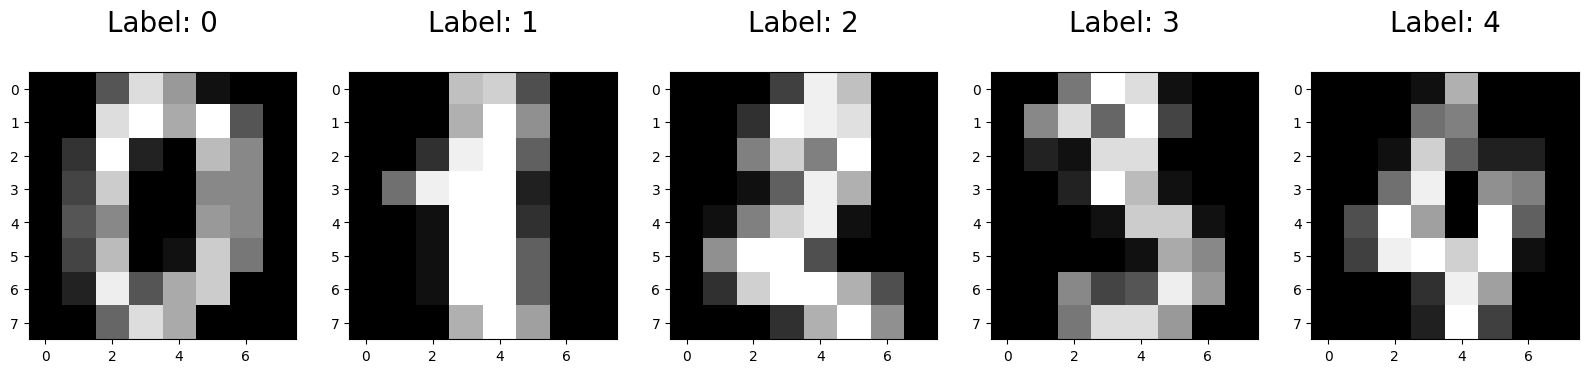

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digitos.data[0:5], digitos.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray)
    plt.title('Label: %i\n' % label, fontsize=20)

### Normalización de datos

In [64]:
from sklearn.preprocessing import MinMaxScaler

if np.max(X) > 1:
 scaler = MinMaxScaler()
 X_norma = scaler.fit_transform(X)
else:
 X_norma = X

### Kmeans

In [65]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X, y = make_blobs(random_state=42)
kmeans = KMeans(n_clusters=10, random_state=42)
silhouette_score(X, kmeans.fit_predict(X))

0.332653185584217

In [66]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_norma)
silhouette = silhouette_score(X_norma, clusters)
davies_bouldin = davies_bouldin_score(X_norma, clusters)
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.18453279438835046
Davies-Bouldin Index: 1.8138890658049387


### Visualización de centroides

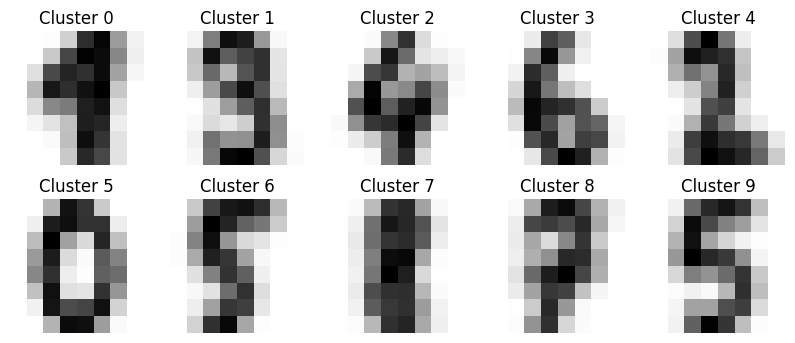

In [68]:
centroids = kmeans.cluster_centers_
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
 centroid = centroids[i]
 centroid_image = centroid.reshape(8, 8)
 ax.imshow(centroid_image, cmap='binary')
 ax.set_title(f'Cluster {i}')
 ax.axis('off')
plt.show()


### Implementación TSNE

In [69]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_norma)

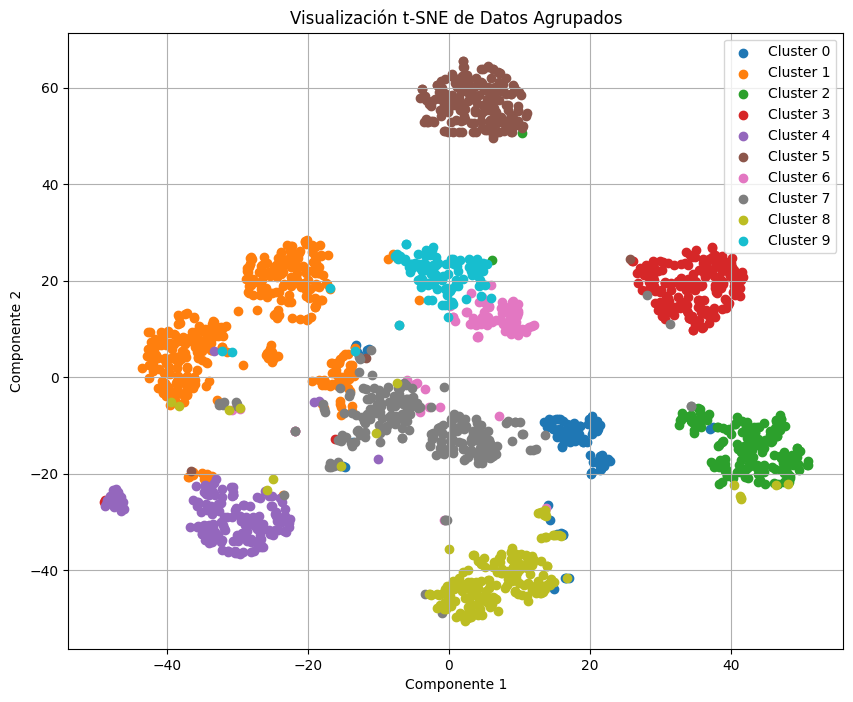

In [70]:
plt.figure(figsize=(10, 8))
for cluster in np.unique(clusters):
    plt.scatter(X_tsne[clusters == cluster, 0], X_tsne[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Visualización t-SNE de Datos Agrupados')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()



Viendo las gráficas, podemos ver que en su mayoría los clusters están correctos, sin mebargo hay 